In [1]:
import matplotlib.pyplot as plt
from elasticsearch import Elasticsearch

es = Elasticsearch("localhost:9200")

In [11]:
print(es.count(index="judgment", doc_type="doc", body={"query":{"match_all": {}}})["count"])

56078


In [26]:
result6 = (es.count(index="judgment", doc_type="doc", body={"query": {"term": {"text_content" : "szkoda"}}})["count"])

result7 = (es.count(index="judgment", doc_type="doc", body={"query": {"match_phrase": {"text_content" : "trwały uszczerbek na zdrowiu"}}})["count"])

result8 = (es.count(index="judgment", doc_type="doc", body={"query": {"match_phrase": {"text_content" : {"query": "trwały uszczerbek na zdrowiu", "slop" : 2}}}})["count"])

result9 = es.search(index="judgment", doc_type="doc", body={"size": 0, "aggs" : {"judges" : {"terms" : {"field" : "judges","size": 3}}}})

In [63]:
print(f"Szoda - count: {result6}")
print(f"Trwały uszczerbek na zdrowiu - count: {result7}")
print(f"Trwały uszczerbek na zdrowiu with slop 2 - count: {result8}")
print("Judges:"+"\n".join(map(lambda x: f"\t{x['key']} : {x['doc_count']}",result9["aggregations"]["judges"]["buckets"])))

Szoda - count: 17926
Trwały uszczerbek na zdrowiu - count: 1499
Trwały uszczerbek na zdrowiu with slop 2 - count: 1602
Judges:	Roman Troll : 375
	Katarzyna Antoniak : 346
	Leszek Dąbek : 318


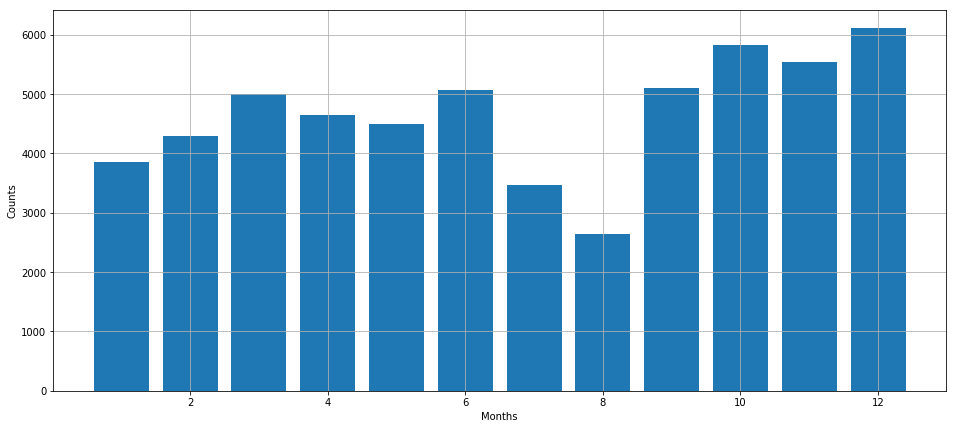

In [57]:
result10 = es.search(index="judgment", doc_type="doc", body={"size":0,"aggs" : {"judgments_per_month" : {"date_histogram" : {"field" : "date","interval" : "month"}}}})
months = []
counts = []
for a in result10["aggregations"]["judgments_per_month"]["buckets"]:
    months.append(int(a["key_as_string"][5:7]))
    counts.append(a["doc_count"])


plt.figure(figsize=(16, 7))
plt.bar(months,counts)
plt.xlabel("Months")
plt.ylabel("Counts")
plt.grid(True)
plt.show()

04
